<a href="https://colab.research.google.com/github/vvviet2908/DA-ML/blob/main/Titanic_Survival_Analysis_%26_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time


Import the data

In [2]:
df = pd.read_csv("/content/titanic.csv")

**Print out top rows in the data**

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Starting from reading this dataset, to answering questions about this data in a few lines of code:

**Calculate the average age for each sex.**

In [4]:
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

**Calculate the average survival ratio for all passengers.**
</div>

In [5]:
df['Survived'].sum()/len(df)

0.3838383838383838

**What is the age distribution of the passengers?**

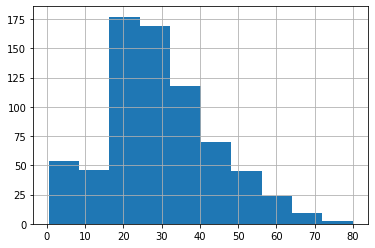

In [6]:
df['Age'].hist()

**How does the survival rate of the passengers differ between sexes?**

Is there a difference in this survival ratio between the sexes? (tip: write the above calculation of the survival ratio as a function)


In [7]:
df.groupby('Sex')['Survived'].aggregate(lambda x: x.sum()/len(x))

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

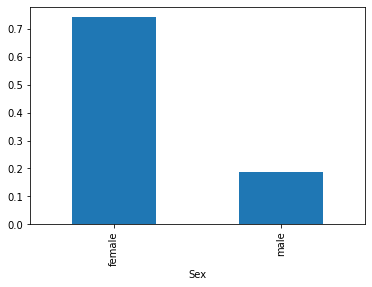

In [8]:
df.groupby('Sex')['Survived'].aggregate(lambda x: x.sum()/len(x)).plot(kind='bar')

**Or how does it differ between the different classes?**

In [9]:
df.groupby('Pclass')['Survived'].aggregate(lambda x: x.sum()/len(x))

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

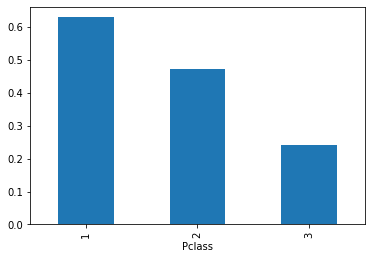

In [10]:
df.groupby('Pclass')['Survived'].aggregate(lambda x: x.sum()/len(x)).plot(kind='bar')

**Are young people more likely to survive?**

In [11]:
df['Survived'].sum()/len(df['Survived'])

0.3838383838383838

In [12]:
dfy=df[df['Age']<25]
dfy['Survived'].sum()/len(dfy['Survived'])

0.4244604316546763

# Feature Engineering - Preprocessing Data

In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, random_state=0)
full_data = [train, test]
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 105 to 684
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  668 non-null    int64  
 1   Survived     668 non-null    int64  
 2   Pclass       668 non-null    int64  
 3   Name         668 non-null    object 
 4   Sex          668 non-null    object 
 5   Age          535 non-null    float64
 6   SibSp        668 non-null    int64  
 7   Parch        668 non-null    int64  
 8   Ticket       668 non-null    object 
 9   Fare         668 non-null    float64
 10  Cabin        157 non-null    object 
 11  Embarked     666 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 67.8+ KB
None


Feature Engineering

Pclass

In [14]:
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.613497
1       2  0.492754
2       3  0.245232


Sex

In [15]:
test['Sex'].isnull().sum()

0

In [16]:
print (train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.753247
1    male  0.192220


Family Size

In [17]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.309406
1           2  0.567797
2           3  0.560000
3           4  0.666667
4           5  0.083333
5           6  0.250000
6           7  0.363636
7           8  0.000000
8          11  0.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.503788
1        1  0.309406


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

Embarked

In [19]:
train['Embarked'].isnull().sum()

2

In [20]:
train.groupby(['Embarked']).size()

Embarked
C    116
Q     60
S    490
dtype: int64

Filling with the most frequencies value "S"

In [21]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.543103
1        Q  0.400000
2        S  0.347561


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Age

we have plenty of missing values in this feature. # generate random numbers between (mean - std) and (mean + std). then we categorize age into 5 range.

In [22]:
train['Age'].isnull().sum()

133

In [ ]:
for dataset in full_data:
    age_avg 	   = dataset['Age'].mean()
    age_std 	   = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

Name

In [24]:
import re as re

In [25]:
def get_title(name):
	title_search = re.search(' ([A-Za-z]+)\.', name)
	# If the title exists, extract and return it.
	if title_search:
		return title_search.group(1)
	return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

print(pd.crosstab(train['Title'], train['Sex']))

Sex       female  male
Title                 
Capt           0     1
Countess       1     0
Dr             0     3
Lady           1     0
Major          0     2
Master         0    33
Miss         132     0
Mlle           2     0
Mme            1     0
Mr             0   394
Mrs           93     0
Ms             1     0
Rev            0     3
Sir            0     1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')


In [27]:
print (train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575758
1    Miss  0.703704
2      Mr  0.157360
3     Mrs  0.819149
4    Rare  0.416667


Data Cleaning

In [ ]:
for dataset in full_data:
    # Mapping Sexzdf['sex'] = np.where(df['sex'] == 'female', 0, 1)
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} )
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4

# Feature Selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp',\
                 'Parch', 'FamilySize']
train = train.drop(drop_elements, axis = 1)

test  = test.drop(drop_elements, axis = 1)

print (train.head(10))

In [29]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
105,0,3,1,1,0,0,1,1
68,1,3,0,1,1,0,0,2
253,0,3,1,1,2,0,0,1
320,0,3,1,1,0,0,1,1
706,1,2,0,2,1,0,1,3


In [30]:
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

Using X_train, X_test, y_train, y_test (as defined above), train a SVC, Decision Tree, k-NN classifiers using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [31]:
def LogisticRegression():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import recall_score, accuracy_score, precision_score
    
    clf = LogisticRegression()
    start = time.time()
    clf.fit(X_train, y_train)
    stop = time.time()
    traintime=stop-start
    predictions = clf.predict(X_test)
    accuracy_score = accuracy_score(y_test, predictions)
    recall_score = recall_score(y_test, predictions)
    precision_score = precision_score(y_test, predictions)

    return accuracy_score, recall_score, precision_score, traintime

In [32]:
def SupportVector():
    from sklearn.svm import SVC
    from sklearn.metrics import recall_score, accuracy_score, precision_score
    
    clf = SVC()    
    start = time.time()
    clf.fit(X_train, y_train)
    stop = time.time()
    traintime=stop-start
    predictions = clf.predict(X_test)
    accuracy_score = accuracy_score(y_test, predictions)
    recall_score = recall_score(y_test, predictions)
    precision_score = precision_score(y_test, predictions)

    return accuracy_score, recall_score, precision_score, traintime

In [33]:
def KNN():
    from sklearn.neighbors import KNeighborsClassifier 
    from sklearn.metrics import recall_score, accuracy_score, precision_score
    
    clf = KNeighborsClassifier()
    start = time.time()
    clf.fit(X_train, y_train)
    stop = time.time()
    traintime=stop-start
    predictions = clf.predict(X_test)
    accuracy_score = accuracy_score(y_test, predictions)
    recall_score = recall_score(y_test, predictions)
    precision_score = precision_score(y_test, predictions)

    return accuracy_score, recall_score, precision_score, traintime

In [34]:
def DecisionTree():
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import recall_score, accuracy_score, precision_score
    
    clf = DecisionTreeClassifier()
    start = time.time()
    clf.fit(X_train, y_train)
    stop = time.time()
    traintime=stop-start
    predictions = clf.predict(X_test)
    accuracy_score = accuracy_score(y_test, predictions)
    recall_score = recall_score(y_test, predictions)
    precision_score = precision_score(y_test, predictions)

    return accuracy_score, recall_score, precision_score, traintime

In [35]:
def RandomForest():
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import recall_score, accuracy_score, precision_score
    
    clf = RandomForestClassifier()
    start = time.time()
    clf.fit(X_train, y_train)
    stop = time.time()
    traintime=stop-start
    predictions = clf.predict(X_test)
    accuracy_score = accuracy_score(y_test, predictions)
    recall_score = recall_score(y_test, predictions)
    precision_score = precision_score(y_test, predictions)

    return accuracy_score, recall_score, precision_score, traintime

In [36]:
knn=KNN()
lr=LogisticRegression()
sv=SupportVector()
dt=DecisionTree()
rf=RandomForest()
sv=list(pd.Series(['SVM',sv[0],sv[1],sv[2],sv[3]]))
dt=list(pd.Series(['DecisionTree',dt[0],dt[1],dt[2],dt[3]]))
knn=list(pd.Series(['KNN',knn[0],knn[1],knn[2],knn[3]]))
lr=list(pd.Series(['Logistic Regression',lr[0],lr[1],lr[2],lr[3]]))
rf=list(pd.Series(['RandomForest',rf[0],rf[1],rf[2],rf[3]]))

In [37]:
compare= pd.DataFrame([lr,sv,knn,dt,rf],columns=['Classifier','Accuracy','Recall','Precision','Runtime'])
compare

,Classifier,Accuracy,Recall,Precision,Runtime
0,Logistic Regression,0.775785,0.761905,0.680851,0.006674
1,SVM,0.793722,0.702381,0.737500,0.011516
2,KNN,0.807175,0.714286,0.759494,0.001856
3,DecisionTree,0.820628,0.666667,0.823529,0.001555
4,RandomForest,0.820628,0.750000,0.768293,0.140922


Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [38]:
def confusionmatrix():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    clf = SVC(C=1e9, gamma=1e-07)
    clf.fit(X_train, y_train)
    y_scores = clf.decision_function(X_test) > -220
    confusion_matrix = confusion_matrix(y_test, y_scores)

    return confusion_matrix
confusionmatrix()


array([[105,  34],
       [ 18,  66]])